<a href="https://colab.research.google.com/github/snehasivakripa/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

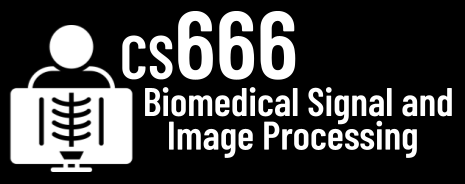

# Assignment 1

In [90]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [91]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [110]:
from biosppy import storage
whole_signal, metadata = storage.load_txt('ecg.txt')


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [93]:
fs = metadata['sampling_rate']
number_samples = len(whole_signal)
duration= number_samples/fs

print("Sampling Rate: "+ str(fs))
print("Duration: "+ str(duration))
SAMPLING_RATE = 0 ### TODO!
SECONDS = 0 ### TODO!

Sampling Rate: 1000.0
Duration: 15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [94]:
from biosppy.signals import ecg
whole_signal_processed=ecg.ecg(signal=whole_signal, sampling_rate=fs, units=None, path=None, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

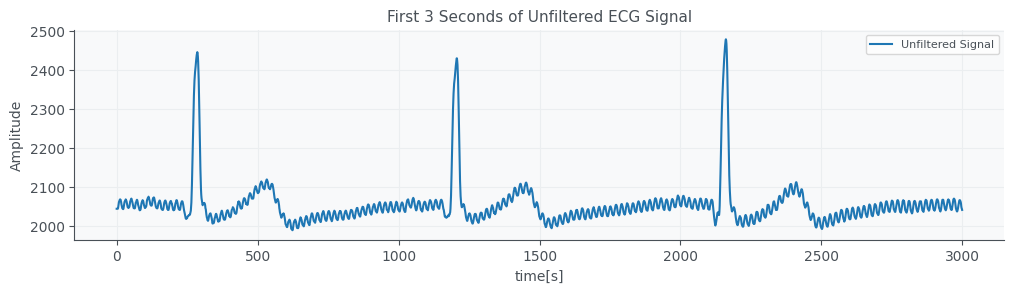

In [95]:
### TODO plot unfiltered signal

# Get the samples for first 3 seconds
duration= 3
samples = int( duration * fs)
first_3_seconds_unfiltered = whole_signal[:samples]
# Plot the unfiltered signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(first_3_seconds_unfiltered, label='Unfiltered Signal')
plt.title('First 3 Seconds of Unfiltered ECG Signal')
plt.xlabel('time[s]')
plt.ylabel('Amplitude')
plt.legend()

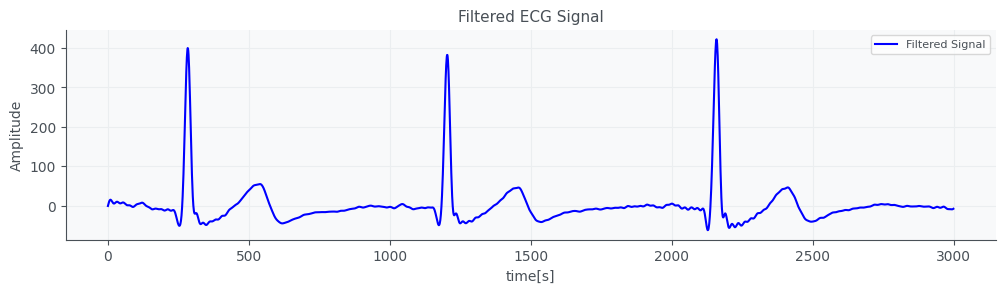

In [96]:
### TODO plot filtered signal
duration= 3
samples = int( duration * fs)
whole_signal_filtered = whole_signal_processed['filtered']
first_3_seconds_filtered =whole_signal_filtered[:samples]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(first_3_seconds_filtered, color='blue', label='Filtered Signal')

plt.title('Filtered ECG Signal')
plt.xlabel('time[s]')
plt.ylabel('Amplitude')
plt.legend()

In [97]:
# Can you spot the P, Q, R, S, T waves?
#--> Yes

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

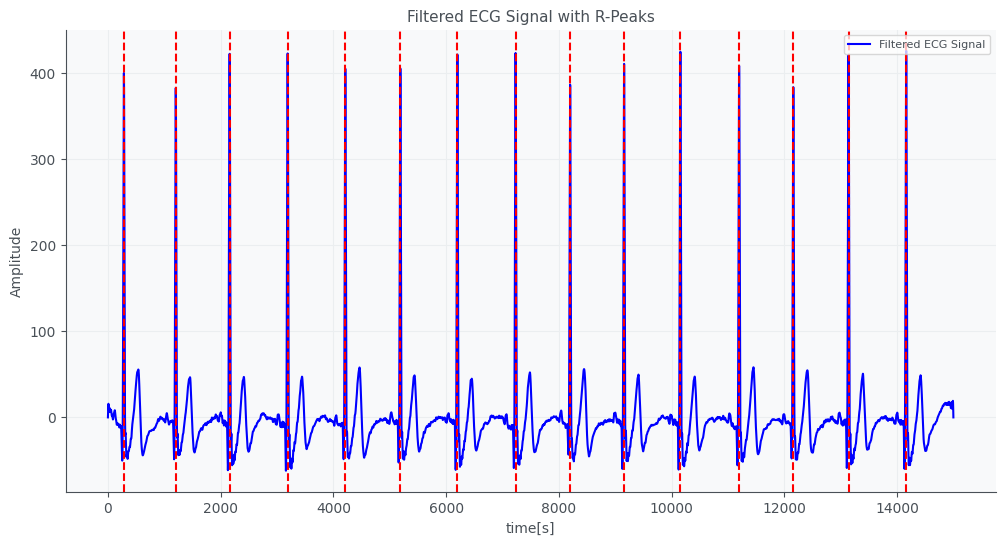

In [98]:
### TODO  Whole filtered Signal

biosppy_rpeaks_whole = whole_signal_processed['rpeaks']

whole_signal_filtered_process=ecg.ecg(signal=whole_signal_filtered, sampling_rate=fs, units=None, path=None, show=False)
biosppy_rpeaks_whole_filtered = whole_signal_filtered_process['rpeaks']

# Plot the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(whole_signal_filtered, color='blue', label='Filtered ECG Signal')

# Mark R-peaks with vertical lines
for rpeak in biosppy_rpeaks_whole_filtered:
    plt.axvline(x=rpeak, color='red', linestyle='--')

plt.title('Filtered ECG Signal with R-Peaks')
plt.xlabel('time[s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [99]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

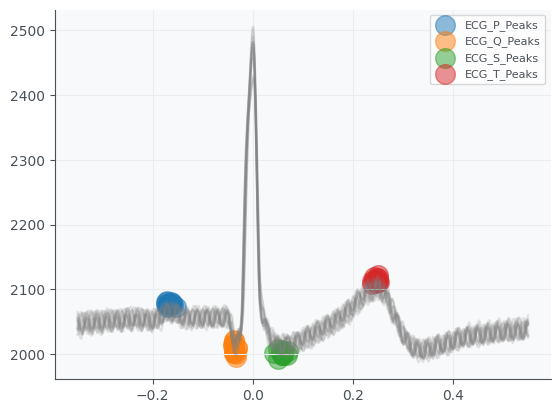

In [100]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

# Delineate the Unfiltered ECG signal whole and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

In [101]:
# TODO Does the detection work well?
# Yes detection works well

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [102]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
!pip install sleepecg
import sleepecg as sleepecg


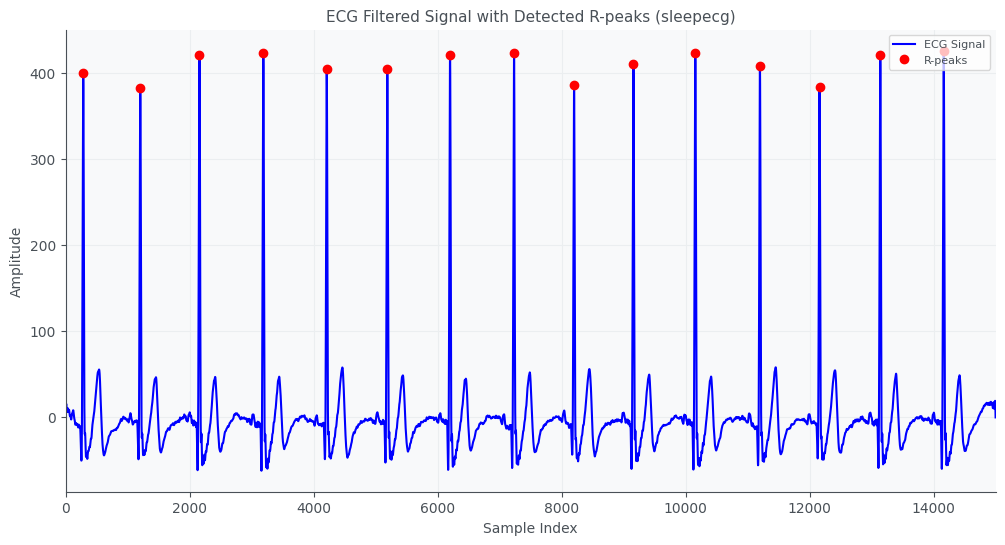

In [103]:
# Detect R-peaks using sleepecg for filtered whole signal
sleepecg_rpeaks = sleepecg.detect_heartbeats(whole_signal_filtered, fs=1000)
# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(whole_signal_filtered, color='b', label='ECG Signal')
plt.plot(sleepecg_rpeaks, whole_signal_filtered[sleepecg_rpeaks], 'ro', label='R-peaks')
plt.title('ECG Filtered Signal with Detected R-peaks (sleepecg)')
plt.xlim(0,len(whole_signal_filtered))
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [104]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

sleepecg_rpeaks_filtered =sleepecg.detect_heartbeats(whole_signal_filtered, fs=1000)
#For filtered signals
print('Unfiltered Biospy Rpeak value'+ str(biosppy_rpeaks_whole_filtered))
print('Unfiltered Sleepecg Rpeak value'+ str(sleepecg_rpeaks_filtered))
from sklearn.metrics import mean_squared_error
mse_whole= mean_squared_error(sleepecg_rpeaks_filtered,biosppy_rpeaks_whole_filtered)
print('MSE  :  '+ str(mse_whole))


Unfiltered Biospy Rpeak value[  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]
Unfiltered Sleepecg Rpeak value[  283  1203  2158  3188  4211  5187  6200  7232  8200  9157 10155 11198
 12159 13139 14162]
MSE  :  0.26666666666666666


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

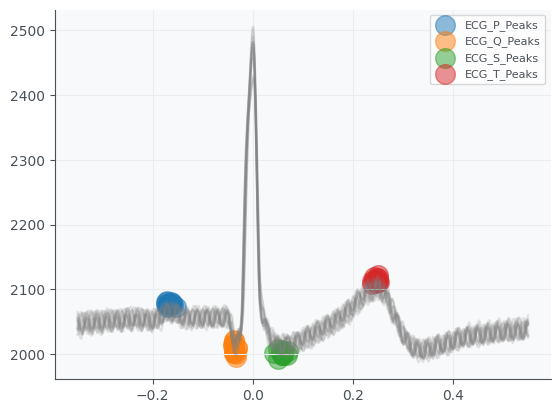

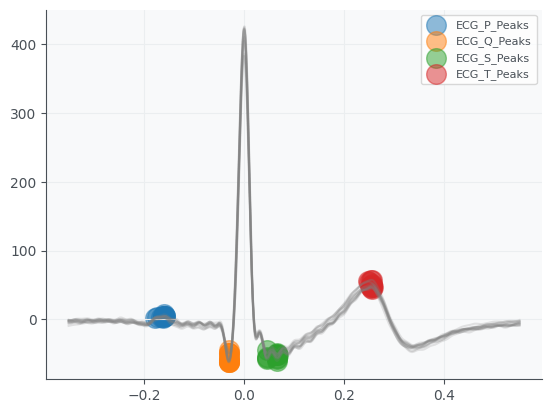

In [105]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal


# Delineate the Unfiltered ECG signal and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

# Delineate the filtered ECG signal and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal_filtered,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

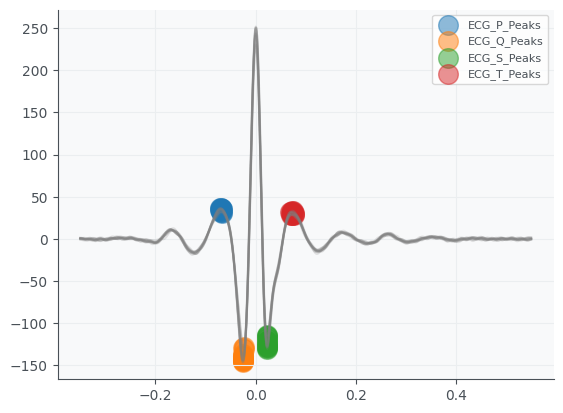

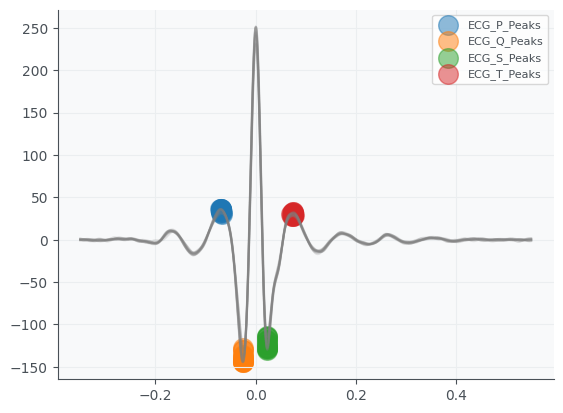

In [106]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.


# Define the lowcut and highcut frequencies for the bandpass filter
lowcut = 10 # Adjust according to your signal characteristics
highcut = 40  # Adjust according to your signal characteristics

# Filter the ECG signal using a bandpass filter
whole_signal_bandpass = nk.signal_filter(whole_signal, lowcut=lowcut, highcut=highcut, method='butterworth', order=4)

# Delineate the Whole ECG signal and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal_bandpass,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

# Define the lowcut and highcut frequencies for the bandpass filter
lowcut = 10 # Adjust according to your signal characteristics
highcut = 40  # Adjust according to your signal characteristics

# Filter the ECG signal using a bandpass filter
whole_signal_filtered_bandpass = nk.signal_filter(whole_signal_filtered, lowcut=lowcut, highcut=highcut, method='butterworth', order=4)


# Delineate the filtered ECG signal and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal_filtered_bandpass,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

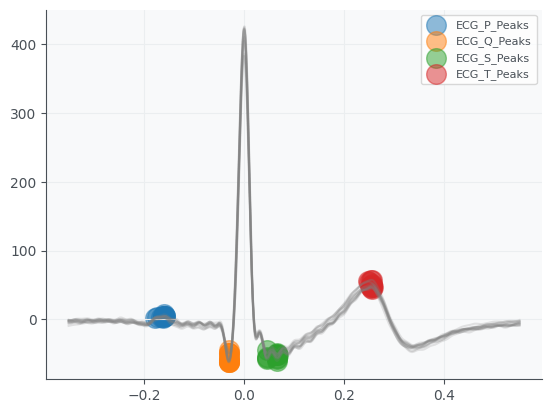

In [107]:
# Finally, run the delineation on the filtered signal from BioSPPY.


# Delineate the Fitered ECG signal and visualizing all peaks of ECG complexes
waves_peak = nk.ecg_delineate(whole_signal_filtered,
                                 method='peak',
                                 show=True,
                                 show_type='peaks')

In [108]:
# TODO Which one works the best?
# Bandpass filtered one is better than the biospy filtered one

In [109]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#